In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pandas.tools.plotting import scatter_matrix
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from operator import itemgetter
from scipy.cluster.hierarchy import dendrogram, linkage
#import squarify

import matplotlib

## Import data from SoyGema
Saved as dataframe(df)

In [6]:
url = "https://raw.githubusercontent.com/SoyGema/Starcraft_2_Data_Analysis/master/data/starcraft.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 21 columns):
GameID                3395 non-null int64
LeagueIndex           3395 non-null int64
Age                   3340 non-null float64
HoursPerWeek          3339 non-null float64
TotalHours            3338 non-null float64
APM                   3395 non-null float64
SelectByHotkeys       3395 non-null float64
AssignToHotkeys       3395 non-null float64
UniqueHotkeys         3395 non-null float64
MinimapAttacks        3395 non-null float64
MinimapRightClicks    3395 non-null float64
NumberOfPACs          3395 non-null float64
GapBetweenPACs        3395 non-null float64
ActionLatency         3395 non-null float64
ActionsInPAC          3395 non-null float64
TotalMapExplored      3395 non-null float64
WorkersMade           3395 non-null float64
UniqueUnitsMade       3395 non-null float64
ComplexUnitsMade      3395 non-null float64
ComplexAbilityUsed    3395 non-null float64
MaxTimeStamp     

In [7]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,0.000110,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,0.000069,0.000294,...,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.0,0.000208,57812
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,0.000042,0.000294,...,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,0.000011,0.000053,...,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,0.000039,0.000000,...,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.0,0.000019,51936


In [9]:
df.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
count,3395.000000,3395.000000,3340.000000,3339.000000,3338.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,...,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,21.647904,15.910752,960.421809,117.046947,0.004299,0.000374,0.000059,0.000098,...,0.003463,40.361562,63.739403,5.272988,0.000283,0.001032,0.000085,0.000059,0.000142,83598.229161
std,2719.944851,1.517327,4.206341,11.962912,17318.133922,51.945291,0.005284,0.000225,0.000038,0.000166,...,0.000992,17.153570,19.238869,1.494835,0.000087,0.000519,0.000025,0.000111,0.000265,33497.667966
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,...,0.000679,6.666700,24.093600,2.038900,0.000091,0.000077,0.000020,0.000000,0.000000,25224.000000
25%,2464.500000,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,0.000033,0.000000,...,0.002754,28.957750,50.446600,4.272850,0.000224,0.000683,0.000068,0.000000,0.000000,60090.000000
50%,4874.000000,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,0.000053,0.000040,...,0.003395,36.723500,60.931800,5.095500,0.000270,0.000905,0.000082,0.000000,0.000020,81012.000000
75%,7108.500000,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,0.000079,0.000119,...,0.004027,48.290500,73.681300,6.033600,0.000325,0.001259,0.000099,0.000086,0.000181,102074.000000
max,10095.000000,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,0.000338,0.003019,...,0.007971,237.142900,176.372100,18.558100,0.000832,0.005149,0.000202,0.000902,0.003084,388032.000000


## Distribution of players

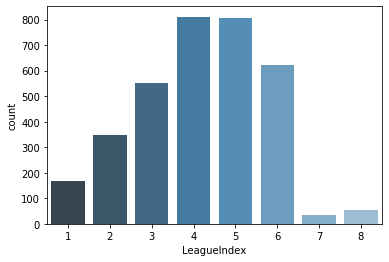

In [12]:
df['LeagueIndex'].value_counts()
sns.countplot(x='LeagueIndex', data=df, palette="Blues_d")

## Hours per week per league

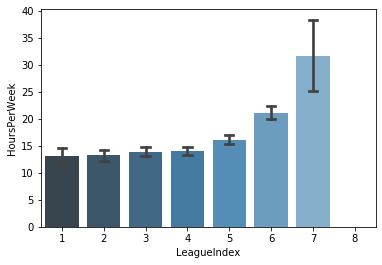

In [15]:
HoursWeek_per_League = sns.barplot(x='LeagueIndex', y='HoursPerWeek', data=df, capsize=.2, palette="Blues_d")

## Average apm per league

APM increase as the league increases

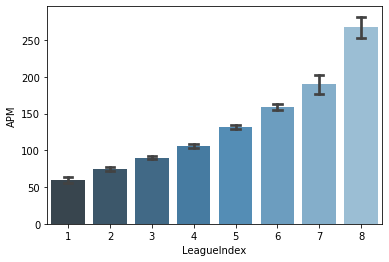

In [27]:
APM_per_League = sns.barplot(x='LeagueIndex', y='APM', data=df, capsize=.2, palette="Blues_d")

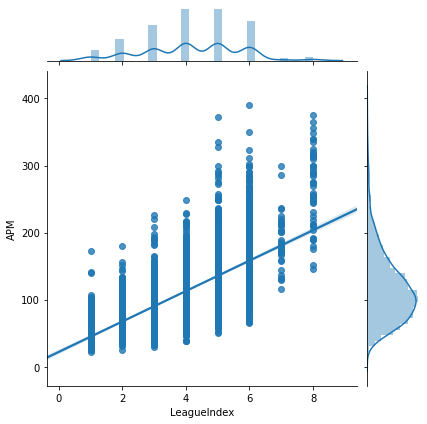

In [25]:
sns.jointplot(df.LeagueIndex, df.APM, kind='reg')
#kind must be either 'scatter', 'reg', 'resid', 'kde', or 'hex'

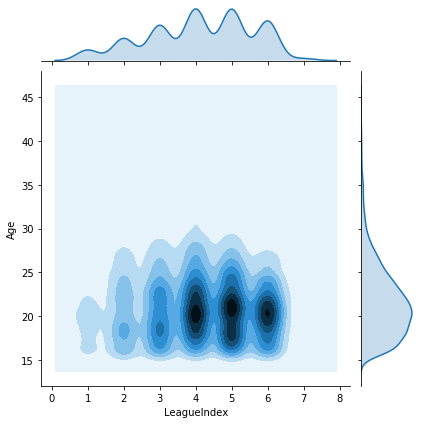

In [35]:
sns.jointplot(df.LeagueIndex, df.Age, kind='kde')
#kind must be either 'scatter', 'reg', 'resid', 'kde', or 'hex'